In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('train.csv')
names = data.columns
data.head(15)

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,100007,s,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,...,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,100008,b,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,...,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,100009,s,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,...,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


### Remove aberrant values and useless parameters

In [5]:
print('Nan in dataframe: ', data.isnull().values.any())
data = data.to_numpy()
print('Original dataset shape: ' + str(data.shape))

Nan in dataframe:  False
Original dataset shape: (250000, 32)


In [47]:
#remove aberrant values
row_keep = []
for i in range(data.shape[0]):
    if -999 not in data[i,:]:
        row_keep.append(i)
data = data[row_keep,:]
print('Dataset shape without aberrant values: ' + str(data.shape))

#remove parameters with sd = 0 (keeping index and categorical values)
col_keep = [0,1]
for i in np.arange(2,data.shape[1],1):
    if np.std(data[:,i]) != 0:
        col_keep.append(i)
data = data[:,col_keep]
print('Dataset shape without parameters with sd = 0: ' + str(data.shape))

Dataset shape without aberrant values: (68114, 32)
Dataset shape without parameters with sd = 0: (68114, 32)


### Visualization of data

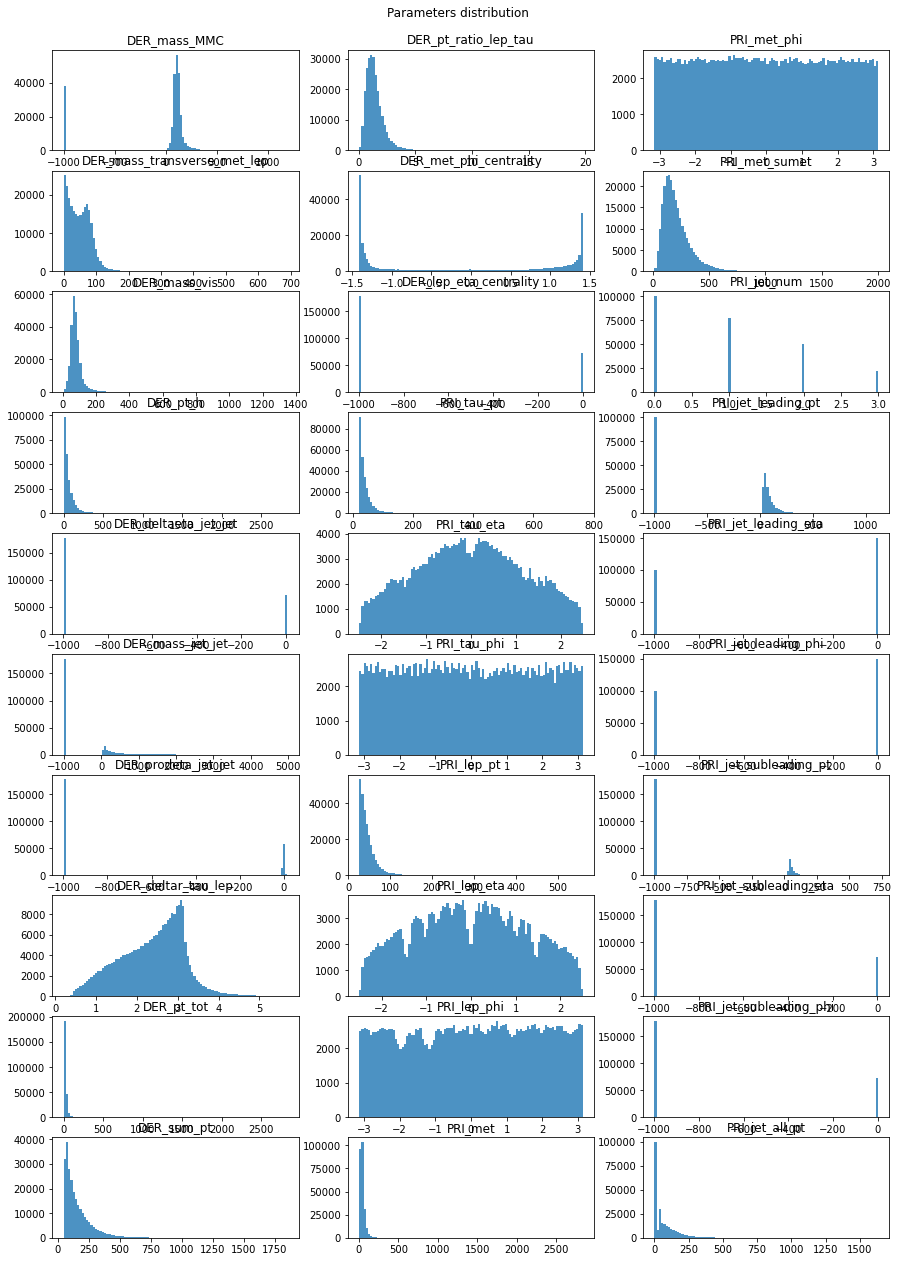

In [6]:
X = data[:,2:]
Y = data[:,1]
p_names = names[2:]
#for i in range(5):
#    plt.figure(figsize=(15,0.5))
#    plt.scatter(X[:,i], Y, alpha = 0.002)
#    plt.show()
fig, axs = plt.subplots(10, 3, figsize = [15,20])
fig.suptitle('Parameters distribution')
fig.subplots_adjust(top=0.95)
for i in range(10):
    axs[i,0].hist(X[:,i], bins = 100, alpha = 0.8)
    axs[i,0].set_title(str(p_names[i]))
for i in range(10):
    axs[i,1].hist(X[:,i+10], bins = 100, alpha = 0.8)
    axs[i,1].set_title(str(p_names[i+10]))
for i in range(10):
    axs[i,2].hist(X[:,i+20], bins = 100, alpha = 0.8)
    axs[i,2].set_title(str(p_names[i+20]))
plt.show()

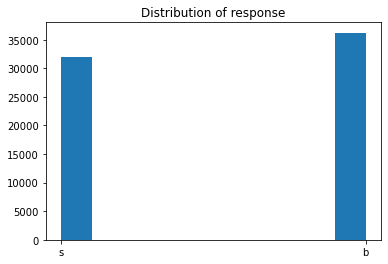

In [12]:
plt.hist(Y)
plt.title('Distribution of response')
plt.show()

### Possible preprocessing

In [53]:
def mean_center(X):
    return X - np.mean(X, axis = 0)

def normalize(X):
    X_max = np.array([np.max(X[:,i]) for i in range(X.shape[1])])
    X_min = np.array([np.min(X[:,i]) for i in range(X.shape[1])])
    return (X - X_min) / (X_max-X_min)

def standardize(X):
    return (X - np.mean(X, axis = 0)) / [np.std(X[:,i]) for i in range(X.shape[1])]